In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [140]:
df = pd.DataFrame({
'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})


In [141]:
np.random.seed(200)
k = 3

In [142]:
centroids = {1:[0,0]}
for i in range(k):
    centroids[i+1] = [np.random.randint(0, 80), np.random.randint(0, 80)]
print("Centroid=",centroids)

Centroid= {1: [26, 16], 2: [68, 42], 3: [55, 76]}


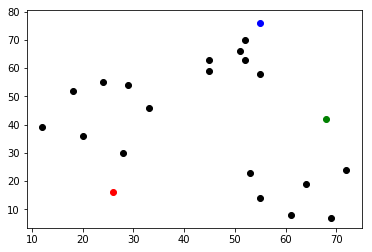

In [143]:
plt.scatter(df['x'], df['y'], color='BLACK')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids: 
    plt.scatter(centroids[i][0], centroids[i][1], color=colmap[i])
plt.show()

In [144]:
def assignment(df, centroids):
    for i in centroids:
        df['distance_from_{}'.format(i)] =( np.sqrt( (df['x'] - centroids[i][0]) ** 2 +(df['y'] - centroids[i][1]) ** 2 ))
    for i, row in df.iterrows(): 
        mini = df.at[i,'distance_from_1']
        minc = 1
        for c in centroids:
            if df.at[i,'distance_from_{}'.format(c)] < mini:
                mini = df.at[i,'distance_from_{}'.format(c)]
                minc = int(c)
        df.at[i,'closest'] = minc
        df.at[i,'color'] = colmap[minc]
    return df
df = assignment(df, centroids)
print(df)


     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        26.925824        56.080300        56.727418      1.0     r
1   20  36        20.880613        48.373546        53.150729      1.0     r
2   28  30        14.142136        41.761226        53.338541      1.0     r
3   18  52        36.878178        50.990195        44.102154      1.0     r
4   29  54        38.118237        40.804412        34.058773      3.0     b
5   33  46        30.805844        35.227830        37.202150      1.0     r
6   24  55        39.051248        45.880279        37.443290      3.0     b
7   45  59        47.010637        28.600699        19.723083      3.0     b
8   45  63        50.695167        31.144823        16.401219      3.0     b
9   52  70        59.933296        32.249031         6.708204      3.0     b
10  51  66        55.901699        29.410882        10.770330      3.0     b
11  52  63        53.712196        26.400758        13.341664      3.0     b

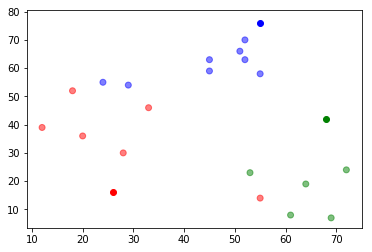

In [145]:
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5)
for i in centroids: 
    plt.scatter(centroids[i][0], centroids[i][1], color=colmap[i])
plt.show()

In [148]:
import copy
def update(centroids):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return centroids
centroids = update(centroids)
print("Updtaed centroids ", centroids)

Updtaed centroids  {1: [27.666666666666668, 36.166666666666664], 2: [63.8, 16.2], 3: [44.125, 61.0]}


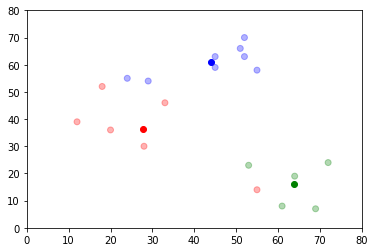

In [149]:
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3) # alpha value for intensity
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

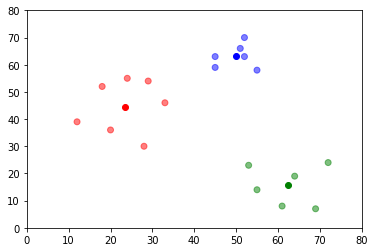

In [111]:
while True:
    old_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if old_centroids.equals(df['closest']):
        break
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

In [122]:
for c in centroids:
    for i, row in df.iterrows(): 
        maxx = 0
        if df.at[i,'distance_from_{}'.format(c)] > maxx:
                maxx = df.at[i,'distance_from_{}'.format(c)]
    plt.Circle((0,0),radius = maxx)
plt.show()

In [119]:
centroids[1]

[23.428571428571427, 44.57142857142857]